In [1]:
!pip install numpy tensorflow tensorflow-gpu matplotlib tensorflow_datasets imageio glob

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 8.0/8.0 MB 7.7 MB/s eta 0:00:00
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
     ------------------------------------- 188.2/188.2 kB 11.9 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ---------------------------------------- 2.2/2.2 MB 8.8 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
     ---------------------------------------- 2.6/2.6 MB 9.0 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\User\AppData\Local\Temp\pip-install-h8xxgusa\tensorflow-gpu_d529b5841ea24654855706695b2b7622\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not 

In [4]:
!pip install matplotlib

  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.2.1-cp311-cp311-win_amd64.whl (188 kB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached fonttools-4.53.0-cp311-cp311-win_amd64.whl (2.2 MB)
  Using cached kiwisolver-1.4.5-cp311-cp311-win_amd64.whl (56 kB)
  Using cached pillow-10.4.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)



[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

     -------------------------------------- 313.5/313.5 kB 6.6 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Cloning https://github.com/tensorflow/docs to c:\users\user\appdata\local\temp\pip-req-build-wlf71tuf
  Resolved https://github.com/tensorflow/docs to commit 6680535155460f7eb0d2d615b9749a0cf721d4ec
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.5.3.31743-py3-none-any.whl size=183958 sha256=ce7cc5bada977f43490d81b615adcd34bede6879241126ad759e5e454fc49d08
  Stored in directory: C:\Users\User\AppData\Local\Temp\pip-ephem-wheel-cache-mscvou8v\wheels\34\53\89\3db54cf97ce0f0261aaab3fdc12a847ea0879d34edf373e2c5
Successfully built tensorflow-docs


  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs 'C:\Users\User\AppData\Local\Temp\pip-req-build-wlf71tuf'

[notice] A new release of pip available: 22.3 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Getting the dataset and Visualizing

In [1]:
import tensorflow as tf
import imageio
import PIL
import time
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow_datasets as tfds

from IPython import display

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

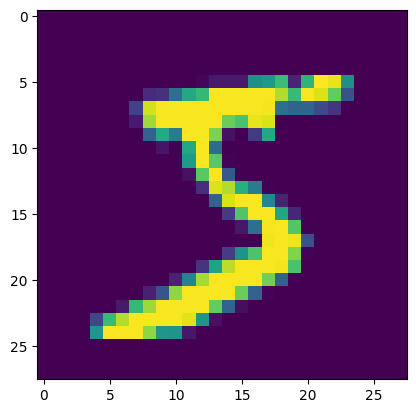

In [4]:
plt.imshow(x_train[0])

In [5]:
data = tf.data.Dataset.from_tensor_slices(x_train)

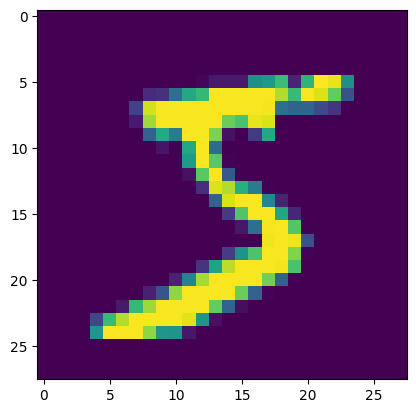

In [6]:
plt.imshow(data.as_numpy_iterator().next())

In [7]:
def scale_img(img):
    expanded_img = tf.expand_dims(img,axis=-1)
    return expanded_img/255

In [8]:
data = data.map(scale_img)
data = data.cache()
data = data.shuffle(60000)
data = data.batch(64)
data = data.prefetch(64)

In [9]:
data.as_numpy_iterator().next().shape

(64, 28, 28, 1)

# Making models

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose, LeakyReLU, Dropout, Flatten, Reshape,BatchNormalization

Generator Model

In [11]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*256, use_bias=False,input_dim=100))
    model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape((7,7,256)))

    model.add(Conv2DTranspose(128,(5,5),strides=(1,1),padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    model.add(Conv2DTranspose(64,(5,5),strides=(2,2),padding='same', use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU())

    
    model.add(Conv2DTranspose(1,(5,5),strides=(2,2),padding='same',activation='sigmoid', use_bias=False))
    
    return model

In [12]:
generator = build_generator()

C:\projects\generative_adversarial_nets\generative_adversarial_nets\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [21]:
img = generator.predict(np.random.randn(4,100,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


In [15]:
img.shape

(4, 28, 28, 1)

In [16]:
img

array([[[[0.4999877 ],
         [0.4974793 ],
         [0.5008164 ],
         ...,
         [0.49919826],
         [0.49978197],
         [0.49915537]],

        [[0.50034887],
         [0.49870503],
         [0.49926513],
         ...,
         [0.498916  ],
         [0.49984765],
         [0.5010203 ]],

        [[0.49902642],
         [0.49933103],
         [0.50045156],
         ...,
         [0.49706382],
         [0.49828282],
         [0.50057244]],

        ...,

        [[0.49918976],
         [0.49943465],
         [0.50726604],
         ...,
         [0.5028862 ],
         [0.50252354],
         [0.49968737]],

        [[0.500227  ],
         [0.50061536],
         [0.49927804],
         ...,
         [0.4970794 ],
         [0.49871463],
         [0.49961463]],

        [[0.5007179 ],
         [0.49875355],
         [0.5022282 ],
         ...,
         [0.4992231 ],
         [0.4991912 ],
         [0.49872825]]],


       [[[0.5002633 ],
         [0.49877626],
         [0.49

Checking the generator model

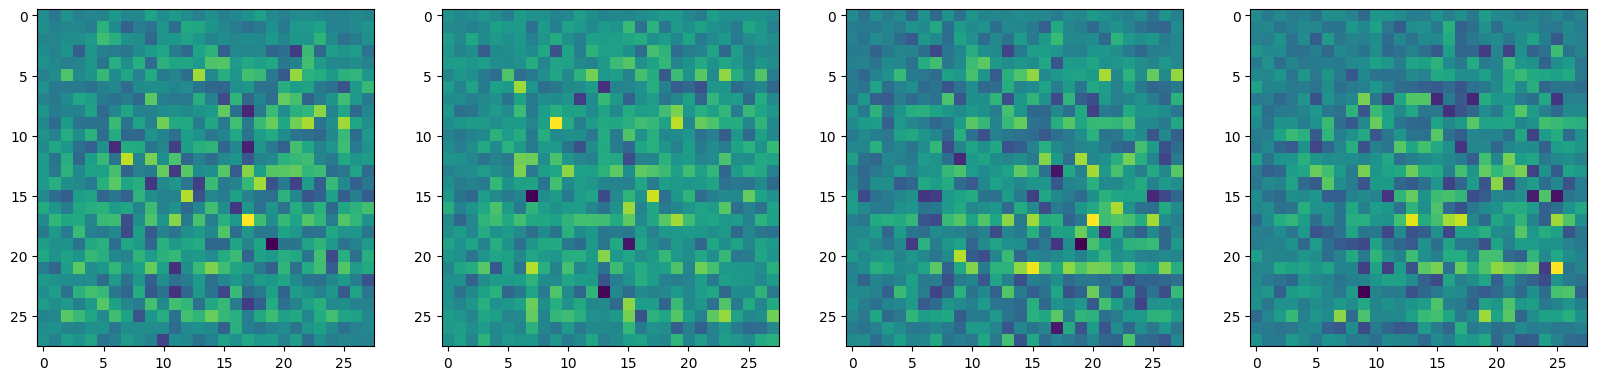

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for x,img in enumerate(img):
    ax[x].imshow(np.squeeze(img))

Discriminator Model

In [18]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(64,(5,5),strides=(2,2),input_shape=(28,28,1),padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Conv2D(128,(5,5),strides=(2,2),padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1,activation='sigmoid'))    

    return model

In [19]:
discriminator = build_discriminator()
discriminator.summary()

C:\projects\generative_adversarial_nets\generative_adversarial_nets\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
img.shape

(28, 28, 1)

In [22]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


array([[0.5133399 ],
       [0.51335204],
       [0.5133089 ],
       [0.5134208 ]], dtype=float32)

# Constructing a Custom Training Step

In [23]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Model

In [24]:
# setting the optimizers
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.0001)

In [25]:
# setting the losses
cross_entropy = BinaryCrossentropy(from_logits=True)
def d_loss(real_outputs, fake_outputs):
    real_loss = cross_entropy(tf.ones_like(real_outputs),real_outputs)
    fake_loss = cross_entropy(tf.zeros_like(fake_outputs),fake_outputs)
    return real_loss+fake_loss

def g_loss(fake_outputs):
    loss = cross_entropy(tf.ones_like(fake_outputs), fake_outputs)
    return loss

In [26]:
np.random.randn(64,128,1)

array([[[ 0.03776731],
        [ 0.33029819],
        [-0.09799979],
        ...,
        [ 0.52856562],
        [-0.31333322],
        [ 0.11871942]],

       [[ 1.10071938],
        [ 0.44339411],
        [ 0.18953521],
        ...,
        [ 0.76658266],
        [-0.37938312],
        [-1.02041799]],

       [[ 0.60074719],
        [-0.2704087 ],
        [ 0.36908332],
        ...,
        [ 0.79156659],
        [-0.23053079],
        [ 0.24845061]],

       ...,

       [[-0.53903358],
        [ 0.5735399 ],
        [ 0.39761537],
        ...,
        [-0.46917726],
        [ 0.86620822],
        [-2.33503379]],

       [[ 1.55330584],
        [ 0.60096695],
        [-0.94054442],
        ...,
        [ 0.08480087],
        [-0.41924834],
        [ 1.67892669]],

       [[-0.31147957],
        [-0.44026315],
        [-0.88237669],
        ...,
        [ 0.05189049],
        [ 0.10096868],
        [ 1.68210354]]])

In [27]:
class GAN(Model):
    def __init__(self, generator,discriminator, *args):
        super().__init__(*args)
        self.generator = generator
        self.discriminator = discriminator
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args):
        super().compile(*args)
        
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        
    def train_step(self, batch):
        noise = np.random.randn(64,100,1)
        real_images = batch
        with tf.GradientTape() as g_tape, tf.GradientTape() as d_tape:
            generated_images = self.generator(noise,training=True)

            real_output = self.discriminator(real_images,training=True)
            fake_output = self.discriminator(generated_images, training=True)

            generator_loss = self.g_loss(fake_output)
            discriminator_loss = self.d_loss(real_output,fake_output)
        g_grad = g_tape.gradient(generator_loss, self.generator.trainable_variables)
        d_grad = d_tape.gradient(discriminator_loss,self.discriminator.trainable_variables)

        g_opt.apply_gradients(zip(g_grad,self.generator.trainable_variables))
        d_opt.apply_gradients(zip(d_grad,self.discriminator.trainable_variables))

    def generate_and_save_images(self,epoch,test_input):
        predictions = self.generator(test_input,training=False)
        fig = plt.figure(figsize=(4,4))
        for i in range(predictions.shape[0]):
            plt.subplot(4,4,i+1)
            plt.imshow(predictions[i,:,:,0])
            plt.axis('off')
            plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
            plt.show()

    def train(self, data, epochs):
        seed = np.random.randn(1,100,1)
        for epoch in range(epochs):
            start = time.time()
            for image_batch in data:
                self.train_step(image_batch)
                display.clear_output(wait=True)
                self.generate_and_save_images(epoch+1,seed)

                print('Time for epoch {} is {} sec'.format(epoch+1,time.time()-start))
            print('1st epoch completed')
            display.clear_output(wait=True)
            self.generate_and_save_images(epochs,seed)

In [28]:
gan = GAN(generator, discriminator)

In [29]:
gan.compile(g_opt, d_opt, g_loss, d_loss)

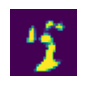

Time for epoch 2 is 761.2709634304047 sec


KeyboardInterrupt: 

In [79]:
gan.train(data,10)

In [30]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [31]:
anim_file = 'dcgan.gif'
import glob
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

C:\Users\User\AppData\Local\Temp\ipykernel_5364\4233524183.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
C:\Users\User\AppData\Local\Temp\ipykernel_5364\4233524183.py:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



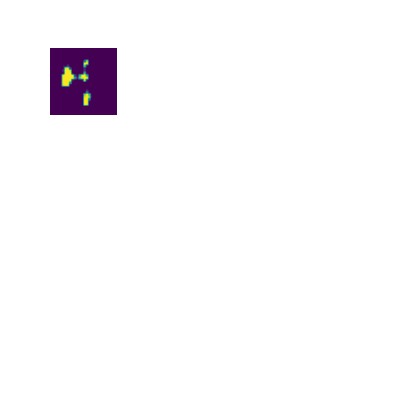

In [32]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)